# 二分类
1. 矩阵由于循环
2. 前向传播和反向传播
3. 逻辑回归(l**ogistic regression**)

<img style="float:left" src="../images/e173fd42de5f1953deb617623d5087e8.png">

**符号定义** ：

$x$：表示一个$n_x$维数据，为输入数据，维度为$(n_x,1)$； 

$y​$：表示输出结果，取值为$(0,1)​$；

$(x^{(i)},y^{(i)})$：表示第$i$组数据，可能是训练数据，也可能是测试数据，此处默认为训练数据； 

$X=[x^{(1)},x^{(2)},...,x^{(m)}]$：表示所有的训练数据集的输入值，放在一个 $n_x×m$的矩阵中，其中$m$表示样本数目; 

$Y=[y^{(1)},y^{(2)},...,y^{(m)}]$：对应表示所有训练数据集的输出值，维度为$1×m$。

用一对$(x,y)$来表示一个单独的样本，$x$代表$n_x$维的特征向量，$y$ 表示标签(输出结果)只能为0或1。
而训练集将由$m$个训练样本组成，其中$(x^{(1)},y^{(1)})$表示第一个样本的输入和输出，$(x^{(2)},y^{(2)})$表示第二个样本的输入和输出，直到最后一个样本$(x^{(m)},y^{(m)})$，然后所有的这些一起表示整个训练集。有时候为了强调这是训练样本的个数，会写作$M_{train}$，当涉及到测试集的时候，我们会使用$M_{test}$来表示测试集的样本数，所以这是测试集的样本数：

<img style="float:left" src="../images/55345ba411053da11ff843bbb3406369.png">

In [1]:
import numpy as np
X=np.ones((3,2))
X.shape

(3, 2)

# 逻辑回归

<img style="float:left" src="../images/dfb5731c30b81eced917450d31e860a3.png">
<img style="float:left" src="../images/7e304debcca5945a3443d56bcbdd2964.png">

# 逻辑回归的代价函数
**为什么需要代价函数：**

<img style="float:left" src="../images/4c9a27b071ce9162dbbcdad3393061d2.png">

训练样本$i$所对应的预测值是${\hat y}^{(i)}$,是用训练样本的${w}^{T}{x}^{(i)}+b$然后通过**sigmoid**函数来得到，也可以把$z$定义为${z}^{(i)}={w}^{T}{x}^{(i)}+b$,我们将使用这个符号$(i)$注解，上标$(i)$来指明数据表示$x$或者$y$或者$z$或者其他数据的第$i$个训练样本，这就是上标$(i)$的含义。

**损失函数：**

损失函数又叫做误差函数，用来衡量算法的运行情况，**Loss function:$L\left( \hat{y},y \right)$.**

逻辑回归中用到的损失函数是：$L\left( \hat{y},y \right)=-y\log(\hat{y})-(1-y)\log (1-\hat{y})$
>* 当$y=1$时损失函数$L=-\log (\hat{y})$，如果想要损失函数$L$尽可能得小，那么$\hat{y}$就要尽可能大，因为**sigmoid**函数取值$[0,1]$，所以$\hat{y}$会无限接近于1。
* 当$y=0$时损失函数$L=-\log (1-\hat{y})$，如果想要损失函数$L$尽可能得小，那么$\hat{y}$就要尽可能小，因为**sigmoid**函数取值$[0,1]$，所以$\hat{y}$会无限接近于0。


**代价函数:**

$J\left( w,b \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{L\left( {\hat{y}}^{(i)},{y}^{(i)} \right)}=\frac{1}{m}\sum\limits_{i=1}^{m}{\left (-{y}^{(i)}\log {\hat{y}}^{(i)}-(1-{y}^{(i)})\log {(1-{\hat{y}}^{(i)})} \right)}$

# 梯度下降法
## **梯度下降法可以做什么？**

<img style="float:left" src="../images/cbd5ff8c461fcb5a699c4ec4789687b3.jpg">

<img style="float:left" src="../images/a3c81d2c8629d674141def47dc02f312.jpg">
<img style="float:left" src="../images/236774be30d12524a2002c3c484d22d5.jpg">
<img style="float:left" src="../images/af11ecd5d72c85f777592f8660678ce6.jpg">

## **梯度下降步骤：**

**1. 初始化$w$和$b$，**

可以用如图那个小红点来初始化参数$w$和$b$，也可以采用随机初始化的方法，对于逻辑回归几乎所有的初始化方法都有效，因为函数是凸函数，无论在哪里初始化，应该达到同一点或大致相同的点。

<img style="float:left" src="../images/0ad6c298d0ac25ca9b26546bb06d462c.jpg">

**2. 朝最陡的下坡方向走一步，不断地迭代**

<img style="float:left" src="../images/bb909b874b2865e66eaf9a5d18cc00e5.jpg">
<img style="float:left" src="../images/c5eda5608fd2f4d846559ed8e89ed33c.jpg">

**3.直到走到全局最优解或者接近全局最优解的地方**

<img style="float:left" src="../images/1b79cca8e1902f0ee24b4eb966755ddd.jpg">

## **梯度下降法的细节化说明（仅有一个参数）**
假定代价函数（成本函数）$J(w)$ 只有一个参数$w$，即用一维曲线代替多维曲线，这样可以更好画出图像。

$w:=w-a\frac{\mathrm{d} J(w)}{\mathrm{d}w}$

$:=$表示更新参数,

$a $ 表示学习率（**learning rate**），用来控制步长（**step**），即向下走一步的长度$\frac{dJ(w)}{dw}$  就是函数$J(w)$对$w$ 求导（**derivative**），在代码中我们会使用$dw$表示这个结果

<img style="float:left" src="../images/4fb3b91114ecb2cd81ec9f3662434d81.jpg">
<img style="float:left" src="../images/21541fc771ad8895c18d292dd4734fe7.jpg">

## **梯度下降法的细节化说明（两个参数）**
$w:=w-a\frac{\partial J(w,b)}{\partial w}$

$b:=b-a\frac{\partial J(w,b)}{\partial b}$

$\partial$ 表示求偏导符号，
$\frac{\partial J(w,b)}{\partial w}$  就是函数$J(w,b)$ 对$w$ 求偏导，在代码中我们会使用$dw$ 表示这个结果，
$\frac{\partial J(w,b)}{\partial b}$  就是函数$J(w,b)$对$b$ 求偏导，在代码中我们会使用$db$ 表示这个结果，
小写字母$d$ 用在求导数（**derivative**），即函数只有一个参数，
偏导数符号$\partial $ 用在求偏导（**partial derivative**），即函数含有两个以上的参数。

# 导数
<img style="float:left" src="../images/efe674e73c693a0c5439b68652ed2ce1.png">

# 更多的导数例子
<img style="float:left" src="../images/c34ba67cca6cb94c79a2e63cc5749c1f.png">
<img style="float:left" src="../images/5b78b725478a0b4def09539f54c784be.png">

# 计算图
一个神经网络的计算，都是按照前向或反向传播过程组织的。首先我们计算出一个新的网络的输出（前向过程），紧接着进行一个反向传输操作。后者我们用来计算出对应的梯度或导数。计算图解释了为什么我们用这种方式组织这些计算过程。

<img style="float:left" src="../images/5216254e20325aad2dd51975bbc70068.png">

# 使用计算图求导数
下面用到的公式：

$\frac{dJ}{du}=\frac{dJ}{dv}\frac{dv}{du}$  ，         $\frac{dJ}{db}=\frac{dJ}{du}\frac{du}{db}$ ，          $\frac{dJ}{da}=\frac{dJ}{du}\frac{du}{da}$

<img style="float:left" src="../images/cd75ffa2793fa4af02bdd869fe962bc1.png">

# 逻辑回归中的梯度下降
假设样本只有两个特征${x}_{1}$和${x}_{2}$，为了计算$z$，我们需要输入参数${w}_{1}$、${w}_{2}$ 和$b$，除此之外还有特征值${x}_{1}$和${x}_{2}$。因此$z$的计算公式为：
$z={w}_{1}{x}_{1}+{w}_{2}{x}_{2}+b$ 

回想一下逻辑回归的公式定义如下：
$\hat{y}=a=\sigma (z)$
其中$z={w}^{T}x+b$，
$\sigma \left( z \right)=\frac{1}{1+{e}^{-z}}$

损失函数：
$L( {\hat{y}}^{(i)},{y}^{(i)})=-{y}^{(i)}\log {\hat{y}^{(i)}}-(1-{y}^{(i)})\log (1-{\hat{y}}^{(i)})$ 

代价函数：
$J\left( w,b \right)=\frac{1}{m}\sum\nolimits_{i}^{m}{L({\hat{y}}^{(i)},{y}^{(i)})}$ 

假设现在只考虑单个样本的情况，单个样本的代价函数定义如下：
$L(a,y)=-(y\log (a)+(1-y)\log (1-a))$ 
其中$a$是逻辑回归的输出，$y$是样本的标签值。

现在让我们画出表示这个计算的计算图。
这里先复习下梯度下降法，$w$和$b$的修正量可以表达如下：

$w:=w-a \frac{\partial J(w,b)}{\partial w}$，$b:=b-a\frac{\partial J(w,b)}{\partial b}$

<img style="float:left" src="../images/03f5f96177ab15d5ead8298ba50300ac.jpg">

前面我们已经讲解了如何在单个训练样本上计算代价函数的前向步骤。

现在让我们来讨论通过**反向计算出导数**。因为我们想要计算出的代价函数$L(a,y)$的导数，首先我们需要反向计算出代价函数$L(a,y)$关于$a$的导数，在编写代码时，你只需要用$da$ 来表示$\frac{dL(a,y)}{da}$  。
通过微积分得到：
$\frac{dL(a,y)}{da}=-y/a+(1-y)/(1-a)$ 。

**可以再反向一步**，在编写**Python**代码时，你只需要用$dz$来表示代价函数$L$关于$z$ 的导数$\frac{dL}{dz}$，也可以写成$\frac{dL(a,y)}{dz}$。

$\frac{dL}{dz}=a-y$ 。
因为$\frac{dL(a,y)}{dz}=\frac{dL}{dz}=(\frac{dL}{da})\cdot (\frac{da}{dz})$，并且$\frac{da}{dz}=a\cdot (1-a)$，
而 $\frac{dL}{da}=(-\frac{y}{a}+\frac{(1-y)}{(1-a)})$，因此将这两项相乘，得到：

${dz} = \frac{{dL}(a,y)}{dz} = \frac{dL}{dz} = \left( \frac{dL}{da} \right) \cdot \left(\frac{da}{dz} \right) = ( - \frac{y}{a} + \frac{(1 - y)}{(1 - a)})\cdot a(1 - a) = a - y$

**最后一步反向推导**，也就是计算$w$和$b$变化对代价函数$L$的影响，可以用:<br>
$d{w}_{1}=\frac{1}{m}\sum\limits_{i}^{m}{x_{1}^{(i)}}({a}^{(i)}-{y}^{(i)})$ <br>
$d{w}_{2}=\frac{1}{m}\sum\limits_{i}^{m}{x_{2}^{(i)}}({a}^{(i)}-{y}^{(i)})$ <br>
$db=\frac{1}{m}\sum\limits_{i}^{m}{({a}^{(i)}-{y}^{(i)})}$ 

$d{w}_{1}$ 表示$\frac{\partial L}{\partial {w}_{1}}={x}_{1}\cdot dz$， <br>
$d{w}_{\text{2}}$ 表示$\frac{\partial L}{\partial {w}_{2}}={x}_{2}\cdot dz$，<br>
$db=dz$。

因此，关于单个样本的梯度下降算法，你所需要做的就是如下的事情：<br>
使用$dz=(a-y)$计算$dz$，<br>
使用$d{w}_{1}={x}_{1}\cdot dz$计算$d{w}_{1}$， <br>
使用$d{w}_{2}={x}_{2}\cdot dz$计算$d{w}_{2}$，<br>
使用$db=dz$ 来计算$db$，<br>
然后:<br>
${w}_{1}:={w}_{1}-a d{w}_{1}$，<br>
${w}_{2}:={w}_{2}-a d{w}_{2}$，<br>
$b:=b-\alpha db$。

<img style="float:left" src="../images/6403f00e5844c3100f4aa9ff043e2319.jpg">

# m个样本的梯度下降

<img style="float:left" src="../images/bf930b1f68d8e0726dda5393afc83672.png">

**代价函数：**
$J\left( w,b \right)=\frac{1}{m}\sum\nolimits_{i}^{m}{L({\hat{y}}^{(i)},{y}^{(i)})}$ 

**反向传播**的全局梯度值：<br>
$d{w}_{1}=\frac{1}{m}\sum\limits_{i}^{m}{x_{1}^{(i)}}({a}^{(i)}-{y}^{(i)})$ <br>
$d{w}_{2}=\frac{1}{m}\sum\limits_{i}^{m}{x_{2}^{(i)}}({a}^{(i)}-{y}^{(i)})$ <br>
$db=\frac{1}{m}\sum\limits_{i}^{m}{({a}^{(i)}-{y}^{(i)})}$ 

**迭代梯度下降：**<br>
${w}_{1}:={w}_{1}-a d{w}_{1}$，<br>
${w}_{2}:={w}_{2}-a d{w}_{2}$，<br>
$b:=b-\alpha db$。

<img style="float:left" src="../images/8b725e51dcffc53a5def49438b70d925.png">

代码流程：

```
J=0;dw1=0;dw2=0;db=0;
for i = 1 to m
    z(i) = wx(i)+b;
    a(i) = sigmoid(z(i));
    J += -[y(i)log(a(i))+(1-y(i)）log(1-a(i));
    dz(i) = a(i)-y(i);
    dw1 += x1(i)dz(i);
    dw2 += x2(i)dz(i);
    db += dz(i);
J/= m;
dw1/= m;
dw2/= m;
db/= m;
w=w-alpha*dw
b=b-alpha*db
```

# 向量化

在单一样本的逻辑回归中我们需要去计算$z={w}^{T}x+b$，$w$、$x$都是列向量。如果我们有很多的特征，那么就会有一个非常大的向量，其中$w\in {\mathbb{R}}^{n_x}$ , $x\in{\mathbb{R}}^{n_x}$，所以如果想使用非向量化方法去计算$w^Tx$，需要用如下方式：

```
z=0
for i in range(n_x)

    z+=w[i]*x[i]
z+=b
```


**向量化实现**
```
z=np.dot(w,x)+b
```

**代码案例：**

In [2]:
import numpy as np #导入numpy库
a = np.array([1,2,3,4]) #创建一个数据a
print(a)
# [1 2 3 4]
import time #导入时间库
a = np.random.rand(1000000)
b = np.random.rand(1000000) #通过round随机得到两个一百万维度的数组
tic = time.time() #现在测量一下当前时间
#向量化的版本
c = np.dot(a,b)
toc = time.time()
print("向量计算:" + str(1000*(toc-tic)) +"ms") #打印一下向量化的版本的时间

#继续增加非向量化的版本
c = 0
tic = time.time()
for i in range(1000000):
    c += a[i]*b[i]
toc = time.time()
print("普通循环:" + str(1000*(toc-tic)) + "ms")#打印for循环的版本的时间

[1 2 3 4]
向量计算:1.0006427764892578ms
普通循环:474.7426509857178ms


# 向量化的更多例子

In [3]:
a=np.arange(4)
a

array([0, 1, 2, 3])

In [4]:
np.exp(a)

array([ 1.        ,  2.71828183,  7.3890561 , 20.08553692])

In [5]:
np.log(a+1)

array([0.        , 0.69314718, 1.09861229, 1.38629436])

In [6]:
np.abs(a)

array([0, 1, 2, 3])

In [7]:
np.maximum(a,2)

array([2, 2, 2, 3])

In [8]:
a**2

array([0, 1, 4, 9], dtype=int32)

In [9]:
a/2

array([0. , 0.5, 1. , 1.5])

用向量算法替代for循环


<img style="float:left" src="../images/af298e37ade1883eaeb44c822e279d42.png">

**去除第一层for循环的代码流程：**

```
J=0;dw=np.zeros((n,1));db=0;
for i = 1 to m
    z(i) = wx(i)+b;
    a(i) = sigmoid(z(i));
    J += -[y(i)log(a(i))+(1-y(i)）log(1-a(i));
    dz(i) = a(i)-y(i);
    dw += x(i)dz(i)
    db += dz(i);
J/= m;
dw1/= m;
dw2/= m;
dw=dw.mean()
db/= m;
w=w-alpha*dw
b=b-alpha*db
```

# 向量化逻辑回归
**去除第二层for循环的代码流程：**

In [10]:
import sympy as sp
sp.init_printing()
def getM(var_name,r,c):
    """
    make a sympy s matrix
    :param var_name:the symbol name
    :param r:matrix s rows
    :param c:matrix s cols
    """
    if r>1 and c>1:
        ss=sp.symbols("{0}_{{{{0:{1}}}{{0:{2}}}}}".format(var_name,r,c))        
    elif r==1:
        ss=sp.symbols("{0}_{{0:{1}}}".format(var_name,c))
    elif c==1:
        ss=sp.symbols("{0}_{{0:{1}}}".format(var_name,r))
    else:
        raise Exception('invalid input parameter！')
    return sp.Matrix([ss[i*c:(i+1)*c] for i in range(r)])

**构造矩阵，前向传播**

<img style="float:left" src="../images/3a8a0c9ed33cd6c033103e35c26eeeb7.png">

In [11]:
m,n=3,4
X=getM('x',n,m)
W=getM('w',n,1)
B=getM('b',1,m)
X,W,B

⎛⎡x_{{0}{0}}  x_{{0}{1}}  x_{{0}{2}}⎤  ⎡w_{0}⎤                       ⎞
⎜⎢                                  ⎥  ⎢     ⎥                       ⎟
⎜⎢x_{{1}{0}}  x_{{1}{1}}  x_{{1}{2}}⎥  ⎢w_{1}⎥                       ⎟
⎜⎢                                  ⎥, ⎢     ⎥, [b_{0}  b_{1}  b_{2}]⎟
⎜⎢x_{{2}{0}}  x_{{2}{1}}  x_{{2}{2}}⎥  ⎢w_{2}⎥                       ⎟
⎜⎢                                  ⎥  ⎢     ⎥                       ⎟
⎝⎣x_{{3}{0}}  x_{{3}{1}}  x_{{3}{2}}⎦  ⎣w_{3}⎦                       ⎠

In [12]:
Z1=W.T*X[:,[0]]+B[[0],0]
Z1

[b_{0} + w_{0}⋅x_{{0}{0}} + w_{1}⋅x_{{1}{0}} + w_{2}⋅x_{{2}{0}} + w_{3}⋅x_{{3}
{0}}]

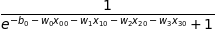

In [13]:
A1=1/(1+sp.exp(-Z1)[0])
A1

In [14]:
Z=W.T*X+B
Z

[b_{0} + w_{0}⋅x_{{0}{0}} + w_{1}⋅x_{{1}{0}} + w_{2}⋅x_{{2}{0}} + w_{3}⋅x_{{3}
{0}}  b_{1} + w_{0}⋅x_{{0}{1}} + w_{1}⋅x_{{1}{1}} + w_{2}⋅x_{{2}{1}} + w_{3}⋅x
_{{3}{1}}  b_{2} + w_{0}⋅x_{{0}{2}} + w_{1}⋅x_{{1}{2}} + w_{2}⋅x_{{2}{2}} + w_
{3}⋅x_{{3}{2}}]

In [15]:
A=Z.applyfunc(lambda x:1/(1+sp.E**(-x)))
A

⎡                                           1                                 
⎢─────────────────────────────────────────────────────────────────────────────
⎢ -b_{0} - w_{0}⋅x_{{0}{0}} - w_{1}⋅x_{{1}{0}} - w_{2}⋅x_{{2}{0}} - w_{3}⋅x_{{
⎣ℯ                                                                            

                                                       1                      
──────────  ──────────────────────────────────────────────────────────────────
3}{0}}       -b_{1} - w_{0}⋅x_{{0}{1}} - w_{1}⋅x_{{1}{1}} - w_{2}⋅x_{{2}{1}} -
       + 1  ℯ                                                                 

                                                                  1           
─────────────────────  ───────────────────────────────────────────────────────
 w_{3}⋅x_{{3}{1}}       -b_{2} - w_{0}⋅x_{{0}{2}} - w_{1}⋅x_{{1}{2}} - w_{2}⋅x
                  + 1  ℯ                                                      

                                ⎤
───────────────

In [16]:
x=np.random.randn(n,m)
w=np.random.randn(n,1)
b=np.random.randn(1,m)
x,w,b

(array([[ 1.11711755,  0.35454944,  0.1777668 ],
        [-0.5513768 , -0.15913049,  0.27497068],
        [-0.67076256,  0.5705479 , -2.92802511],
        [ 0.80782945,  2.16104962, -1.71683675]]), array([[-0.40908726],
        [ 0.03913573],
        [-0.01835147],
        [ 0.20966831]]), array([[-1.00599687, -1.35187798, -0.77622394]]))

In [17]:
z=np.dot(w.T,x)+b
z

array([[-1.30288825, -1.06051411, -1.14441758]])

In [18]:
a=1/(1+np.exp(z))
a

array([[0.78632067, 0.74278878, 0.75848979]])

# 向量化逻辑回归的梯度输出
之前我们在讲梯度计算的时候，逐个求解：<br> 
$dz^{(1)}=a^{(1)}-y^{(1)}$，<br>
$dz^{(2)}=a^{(2)}-y^{(2)}$ ……等等一系列类似公式。

现在，对 $m$个训练数据做同样的运算，我们可以定义一个新的变量：<br>
$dZ=[dz^{(1)} ,dz^{(2)} ... dz^{(m)}]$，所有的 $dz$ 变量横向排列，因此，$dZ$ 是一个 $1\times m$ 的矩阵，或者说，是一个$m$维行向量。

之前的学习中，我们已经知道如何计算真实输出值$Y$的估计值$A$，<br>
即 $[a^{(1)},a^{(2)} ... a^{(m)}]$,我们需要找到这样的一个行向量 $Y=[y^{(1)} y^{(2)} ... y^{(m)}]$ ，<br>
由此，我们可以这样计算 $dZ=A-Y=[a^{(1)}-y^{(1)},a^{(2)}-y^{(2)},...,a^{(m)}-y^{(m)}]$，<br>
不难发现第一个元素就是 $dz^{(1)}$，第二个元素就是 $dz^{(2)}$ ……所以我们现在仅需一行代码，就可以同时完成这所有的计算。

在之前的实现中，我们已经去掉了一个逐个特征**for**循环，但我们仍有一个遍历训练集的循环，如下所示：

$dw=0$<br>
$dw + = x^{(1)}*{dz}^{(1)}$<br>
$dw + = x^{(2)}\ *dz^{(2)}$<br>
………….<br>
$dw + = x^{(m)}*{dz}^{(m)}$<br>
$dw = \frac{dw}{m}$<br>
$db = 0$<br>
$db + = {dz}^{(1)}$<br>
$db + = {dz}^{(2)}$<br>
………….<br>
$db + = dz^{(m)}$<br>
$db = \frac{db}{m}$

上述（伪）代码就是我们在之前实现中做的，我们已经去掉了一个**for**循环，但用上述方法计算 $dw$ 仍然需要一个循环遍历训练集，我们现在借鉴前向传播中将样本**for**循环向量化的方法，将反向传播向量化！

**向量化**

$Z = w^{T}X + b = np.dot( w.T,X)+b$<br>
$A = \sigma( Z )$<br>
$dZ = A - Y$<br>
${{dw} = \frac{1}{m}*X*dz^{T}\ }$<br>
$db= \frac{1}{m}*np.sum( dZ)​$<br>
$w: = w - a*dw$<br>
$b: = b - a*db$<br>

# 逻辑回归损失函数
## **损失函数：**

损失函数又叫做误差函数，用来衡量算法的运行情况，**Loss function:$L\left( \hat{y},y \right)$.**

逻辑回归中用到的损失函数是：$L\left( \hat{y},y \right)=-y\log(\hat{y})-(1-y)\log (1-\hat{y})$
>* 当$y=1$时损失函数$L=-\log (\hat{y})$，如果想要损失函数$L$尽可能得小，那么$\hat{y}$就要尽可能大，因为**sigmoid**函数取值$[0,1]$，所以$\hat{y}$会无限接近于1。
* 当$y=0$时损失函数$L=-\log (1-\hat{y})$，如果想要损失函数$L$尽可能得小，那么$\hat{y}$就要尽可能小，因为**sigmoid**函数取值$[0,1]$，所以$\hat{y}$会无限接近于0。

回想一下，在逻辑回归中，需要预测的结果$\hat{y}$,可以表示为$\hat{y}=\sigma(w^{T}x+b)$，$\sigma$是我们熟悉的$S$型函数 $\sigma(z)=\sigma(w^{T}x+b)=\frac{1}{1+e^{-z}}$ 。

我们约定 $\hat{y}=p(y=1|x)$ ，即算法的输出$\hat{y}$ 是给定训练样本 $x$ 条件下 $y$ 等于1的概率。

换句话说，如果$y=1$，在给定训练样本 $x$ 条件下$y=\hat{y}$；

反过来说，如果$y=0$，在给定训练样本$x$条件下 $y$ 等于1减去$\hat{y},即(y=1-\hat{y})$，因此，如果 $\hat{y}$ 代表 $y=1$ 的概率，那么$1-\hat{y}$就是 $y=0$的概率。即:<br>
$\begin{cases}if&y=1:&p(y=1|x)=\hat y\\if&y=0:&p(y=0|x)=1-\hat y\end{cases}$

上述的两个条件概率公式可以合并成如下公式：

$p(y|x)={\hat{y}}^{y}{(1-\hat{y})}^{(1-y)}$

第一种情况，假设 $y=1$，由于$y=1$，那么${(\hat{y})}^{y}=\hat{y}$，因为 $\hat{y}$的1次方等于$\hat{y}$，${(1-\hat{y})}^{(1-y)}$的指数项$(1-y)$等于0，由于任何数的0次方都是1，$\hat{y}$乘以1等于$\hat{y}$。因此当$y=1$时 $p(y|x)=\hat{y}$。

第二种情况，当 $y=0$ 时 $p(y|x)$ 等于多少呢?
假设$y=0$，$\hat{y}$的$y$次方就是 $\hat{y}$ 的0次方，任何数的0次方都等于1，因此 $p(y|x)=1×{(1-\hat{y})}^{1-y}$ ，前面假设 $y=0$ 因此$(1-y)$就等于1，因此 $p(y|x)=1×(1-\hat{y})$。因此在这里当$y=0$时，$p(y|x)=1-\hat{y}$。

刚才的推导表明 $p(y|x)={\hat{y}}^{(y)}{(1-\hat{y})}^{(1-y)}$，就是 $p(y|x)$ 的完整定义。由于 log 函数是严格单调递增的函数，最大化 $log(p(y|x))$ 等价于最大化 $p(y|x)$ 并且地计算 $p(y|x)$ 的 log对数，就是计算 $log({\hat{y}}^{(y)}{(1-\hat{y})}^{(1-y)})$ (其实就是将 $p(y|x)$ 代入)，通过对数函数化简为：

$ylog\hat{y}+(1-y)log(1-\hat{y})$

而这就是我们前面提到的损失函数的负数 $(-L(\hat{y},y))$ ，前面有一个负号的原因是当你训练学习算法时需要算法输出值的概率是最大的（以最大的概率预测这个值），然而在逻辑回归中我们需要最小化损失函数，因此最小化损失函数与最大化条件概率的对数 $log(p(y|x))$ 关联起来了，因此这就是单个训练样本的损失函数表达式。

## **$m$个训练样本的整个训练集对应的代价函数**

假设所有的训练样本服从同一分布且相互独立，也即独立同分布的，所有这些样本的联合概率就是每个样本概率的乘积:

$P\left(\text{labels  in training set} \right) = \prod_{i =1}^{m}{P(y^{(i)}|x^{(i)})}$。

如果你想做最大似然估计，需要寻找一组参数，使得给定样本的观测值概率最大，但令这个概率最大化等价于令其对数最大化，在等式两边取对数：

$logp\left( \text{labels  in  training set} \right) = log\prod_{i =1}^{m}{P(y^{(i)}|x^{(i)})} = \sum_{i = 1}^{m}{logP(y^{(i)}|x^{(i)})} = \sum_{i =1}^{m}{- L(\hat y^{(i)},y^{(i)})}$

在统计学里面，有一个方法叫做最大似然估计，即求出一组参数，使这个式子取最大值，也就是说，使得这个式子取最大值，$\sum_{i= 1}^{m}{- L(\hat y^{(i)},y^{(i)})}$，可以将负号移到求和符号的外面，$- \sum_{i =1}^{m}{L(\hat y^{(i)},y^{(i)})}$，这样我们就推导出了前面给出的**logistic**回归的成本函数$J(w,b)= \sum_{i = 1}^{m}{L(\hat y^{(i)},y^{\hat( i)})}$。

# 练习搭建神经网络
## 环境和库包

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import h5py#一个操作h5文件的通用包
import scipy
from lr_utils import load_dataset
from scipy import ndimage
%matplotlib inline

## 问题分析
我们能够获得数据为:
1. 标记了是否有猫的训练集；
2. 标记了是否有猫的测试集；
3. 每一个图片文件的数据结构为（num_px，num_px，3），其中3指的是RGB三原色的的数据结构，每一张图片都是一个高度和宽度相等为64的方形图片。

基于上面的数据，我们建立一个能够识别图片是否有猫图片识别模型。

In [20]:
# 加载数据
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [21]:
train_set_x_orig.shape

In [22]:
classes

array([b'non-cat', b'cat'], dtype='|S7')

y = [1], 这是一个 'cat' picture.


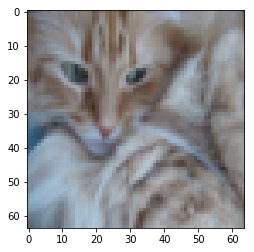

In [23]:
# 随机抽取样本集中的图片
index = 2
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", 这是一个 '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [24]:
train_set_x_flatten=train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten=test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

In [25]:
train_set_x_flatten.shape,train_set_y.shape,test_set_x_flatten.shape,test_set_y.shape

**数据标准化**

In [26]:
train_set_x_flatten.max(),train_set_x_flatten.min()

(255, 0)

In [27]:
train_set_x=train_set_x_flatten/255
test_set_x=test_set_x_flatten/255

**数据加工要点：**
1. 了解数据规模和数据的结构
2. 按照矩阵的要求，整理数据的结构
3. 数据标准化

## 模型结构

<img src="images/LogReg_kiank.png" style="float:left;width:650px;height:400px;">

**模型表达式**:

以$x^{(i)}$为例:<br>
$z^{(i)} = w^T x^{(i)} + b$<br>
$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})$<br>
$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})$<br>

训练样本集的代价函数（成本函数）:<br>
$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$

**关键步骤:**
1. 初始化模型的参数w、b；
2. 通过最小化代价函数值学习最优的参数；
3. 使用最优参数预测测试集；
4. 分析预测结果并给出结论；

## 构建模型的各功能模块
建立神经网络的主要步骤为:
1. 定义模型的结构；
2. 初始化模型的参数；
3. 梯度下降迭代：
    * 正向传播，计算代价函数值；
    * 反向传播，计算梯度下降值；
    * 用梯度下降值更新模型的参数；
    
### sigmoid函数

In [28]:
# sigmoid
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))    
    return s

In [29]:
sigmoid(np.array([0,1]))

array([0.5       , 0.73105858])

### 参数初始化函数

In [30]:
# initialize_with_zeros
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))    
    return w, b

In [31]:
dim=3
w,b=initialize_with_zeros(dim)
w,b

(array([[0.],
        [0.],
        [0.]]), 0)

### 前向和后向传播函数
**前向传播：**

* 计算$Y$的估计值$A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
* 代价函数值： $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

**反向传播:**

* $ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$
* $ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$

In [32]:
# propagate
def propagate(w, b, X, Y):    
    m = X.shape[1]#样本量
    A = sigmoid(np.dot(w.T, X) + b)#真实标签值的估计值
    cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))#成本函数值
    dw = 1 / m * np.dot(X, (A - Y).T)
    db = 1 / m * np.sum(A - Y)
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())    
    grads = {"dw": dw,
             "db": db}    
    return grads, cost

In [33]:
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


### 优化(梯度下降)函数

In [34]:
# optimize
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):    
    costs = []    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate * dw
        b = b - learning_rate * db
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))  
    params = {"w": w,
              "b": b}    
    grads = {"dw": dw,
             "db": db}    
    return params, grads, costs

In [35]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print(costs)

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828
[6.000064773192205]


### 预测函数
$\hat{Y} = A = \sigma(w^T X + b)$

In [36]:
# predict
def predict(w, b, X): 
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        if A[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1
    assert(Y_prediction.shape == (1, m))    
    return Y_prediction

In [37]:
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


## 用模块函数搭建模型

In [38]:
# model
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w, b = initialize_with_zeros(X_train.shape[0])#初始化模型参数
    # 训练模型获得最优参数
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    Y_prediction_test = predict(w, b, X_test)#预测测试集
    Y_prediction_train = predict(w, b, X_train)#预测训练集
    print("训练集的准确率: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("测试集的准确率: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations} 
    return d

In [39]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y
          , num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
训练集的准确率: 99.04306220095694 %
测试集的准确率: 70.0 %


**备注：**
1. 我们可以基于训练集的准确率，来检验模型是否准确。训练准确度接近100%，说明我们的模型搭建的没有逻辑bug；
2. 测试集的准确率为70%，这个对于小样本的数据集，以及简单的逻辑回归算法来说；
3. 通过训练集合和测试集预测准确度的偏差，说明模型存在过度优化的问题；

y = 0, 预测的结果是: "non-cat" picture.


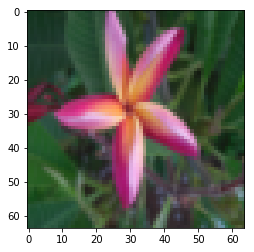

In [40]:
# 例子
index = 16
num_px=64
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", 预测的结果是: \"" + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") +  "\" picture.")

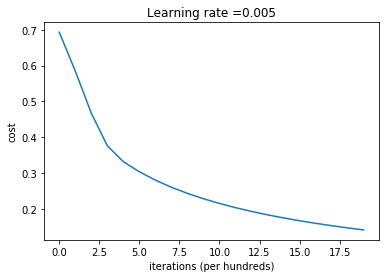

In [41]:
# 学习曲线即成本函数值
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

## 不同的学习率

学习率: 0.01
训练集的准确率: 99.52153110047847 %
测试集的准确率: 68.0 %

-------------------------------------------------------

学习率: 0.001
训练集的准确率: 88.99521531100478 %
测试集的准确率: 64.0 %

-------------------------------------------------------

学习率: 0.0001
训练集的准确率: 68.42105263157895 %
测试集的准确率: 36.0 %

-------------------------------------------------------



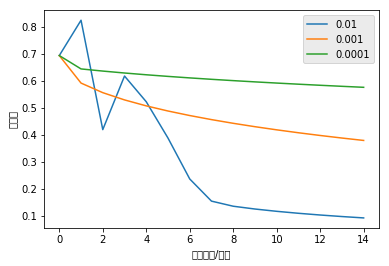

In [42]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("学习率: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('成本值')
plt.xlabel('迭代次数/百次')

legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

## 预测一个非数据集图片

d:\env\pythonve\test36\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """


y = 0.0, 模型预测结果是： "non-cat" picture.


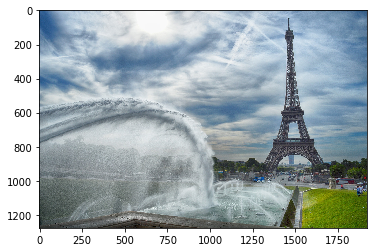

In [43]:
my_image = "my_image.jpg"   # 图片的名称
# 整理图片数据
fname = "images/" + my_image
image = np.array(plt.imread(fname))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)
plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + 
      ", 模型预测结果是： \"" 
      + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")